In [2]:
import pandas as pd

In [3]:
from pathlib import Path
DATA_DIR = Path.cwd() / "data/"

In [4]:
sooList_1962 = pd.read_json(DATA_DIR / "sooList_196801.json")

In [5]:
def concat_data(param_name: str, sdate: str, edate: str):
    from datetime import datetime
    collected = pd.DataFrame()

    sdate_dt = datetime.strptime(sdate, "%Y-%m-%d")
    edate_dt = datetime.strptime(edate, "%Y-%m-%d")

    start_year = sdate_dt.year
    end_year = edate_dt.year

    for year in range(start_year, end_year + 1):
        for month in range(1, 13):
            f = DATA_DIR / f"sooList_{year}{month:02d}.json"
            try:
                if f.is_file():
                    df = pd.read_json(f)
                    if param_name in df.columns:
                        collected = pd.concat([collected, df[[param_name]]], ignore_index=True)
            except Exception as e:
                print(f"Error reading {f.name}: {e}")

    return collected


In [6]:
sdate = "1968-01-01"
edate = "2025-12-31"
temperature = concat_data("wtr_tmp", sdate, edate)
depth = concat_data("wtr_dep", sdate, edate)
time = concat_data("obs_dtm", sdate, edate)
line = concat_data("sln_cde", sdate, edate)
station = concat_data("sta_cde", sdate, edate)

In [7]:
mask = (depth["wtr_dep"] == 0) & (line["sln_cde"] == 208) & (station["sta_cde"] == 1)

In [12]:
x = pd.to_datetime(time[mask].squeeze())
y = temperature[mask].squeeze()

In [9]:
import matplotlib.pyplot as plt

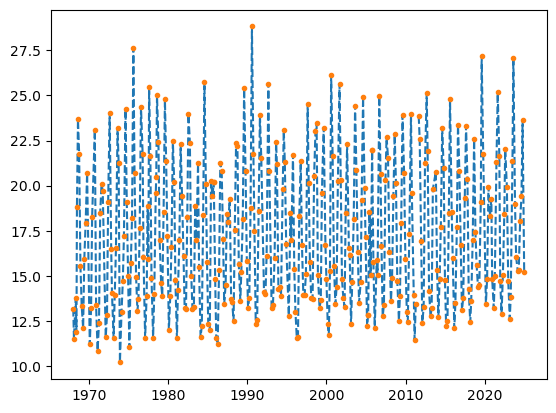

In [15]:
plt.plot(x, y, '--')
plt.plot(x, y, '.')